In [1]:
import tifffile
import trackpy as tp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:

# Load the TIFF movie
A6_568_movie = tifffile.imread('Raw-Data/20230317_A6-568-SRRF_100g_50ms_strobe_1_auto_adjusted.tif')
A4_640_movie = tifffile.imread('Raw-Data/A4-640_100g_50ms_1_auto_adjusted.tif')
print(f"A6-568 Frame Count: {len(A6_568_movie)}")
print(f"A4-640 Frame Count: {len(A4_640_movie)}")

A6-568 Frame Count: 7500
A4-640 Frame Count: 10000


In [3]:
def get_PSF_frame(movie_frame, x, y, frame_size, keep_edges=False):
    half_frame = int(frame_size/2)
    int_x = round(x); int_y = round(y)
    lower_x = int_x - half_frame
    lower_y = int_y - half_frame
    upper_x = int_x + half_frame + 1
    upper_y = int_y + half_frame + 1
    upper_limit_x = movie_frame.shape[1]
    upper_limit_y = movie_frame.shape[0]
    if keep_edges:
        if lower_x < 0:
            lower_x = 0
        if lower_y < 0:
            lower_y = 0
        if upper_x > upper_limit_x:
            upper_x = upper_limit_x
        if upper_y > upper_limit_y:
            upper_y = upper_limit_y
    else:
        if lower_x < 0 or lower_y < 0 or upper_x > upper_limit_x or upper_y > upper_limit_y:
            return False
    return np.array(movie_frame)[lower_y:upper_y, lower_x:upper_x]

def get_PSF_frames(movie, minmass=2000, separation=3, diameter=7, frame_size=13, percentile=0.9, to_plot=False, movie_frames=True, dpi=100):
    if type(movie_frames) == bool:
        movie_frames = range(len(movie))
    
    # Initialize an empty list to store the PSF frames
    PSF_frames = []

    # Loop through each frame in the movie
    for i in movie_frames:
        # Perform localization on the frame
        full_frame = tp.locate(movie[i], diameter=diameter, 
                        minmass=minmass, max_iterations=10,
                        separation=separation, percentile=percentile)  # Adjust the minmass parameter as needed

        # Plot the frame with the identified features
        if to_plot:
            fig, ax = plt.subplots(1, dpi=dpi)
            ax.imshow(movie[i], cmap='gray')

        # Draw a box around each identified feature
        for index, row in full_frame.iterrows():
            if to_plot:
                rect = patches.Rectangle((row['x']-int(frame_size/2), row['y']-int(frame_size/2)), frame_size, frame_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
            PSF_frame = get_PSF_frame(movie[i], row['x'], row['y'], frame_size)
            if type(PSF_frame) == bool:
                continue
            PSF_frames.append(PSF_frame)
        if to_plot:
            plt.title(f'Full Frame {i}')
            plt.show()

    # Convert the list of frames to a numpy array
    PSF_frames = np.array(PSF_frames)
    return PSF_frames

# Separate Movies

In [4]:
# indices = np.random.choice(range(7500), 3)
# print(indices)
indices = [10, 500, 1000, 2000, 4000, 6000]

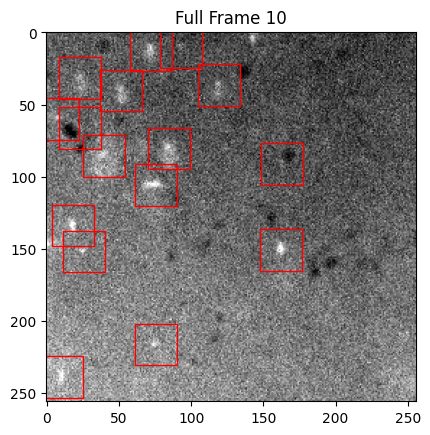

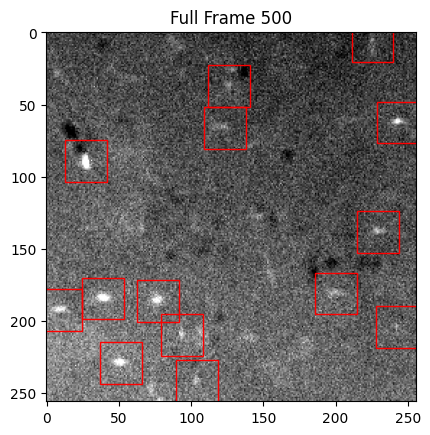

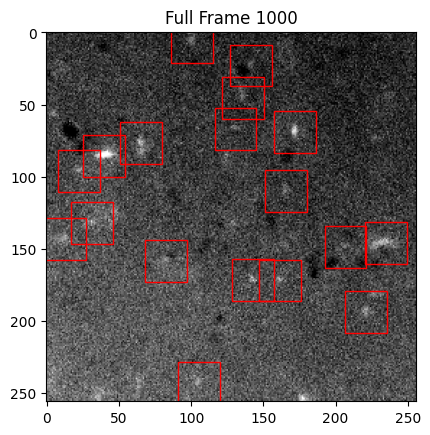

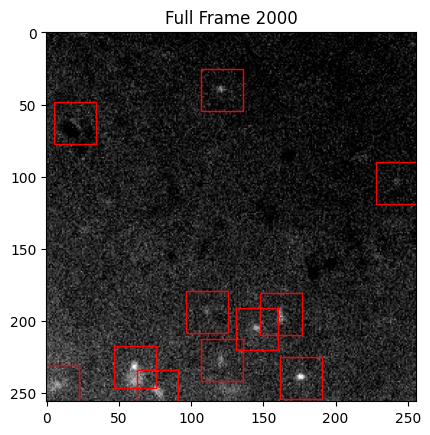

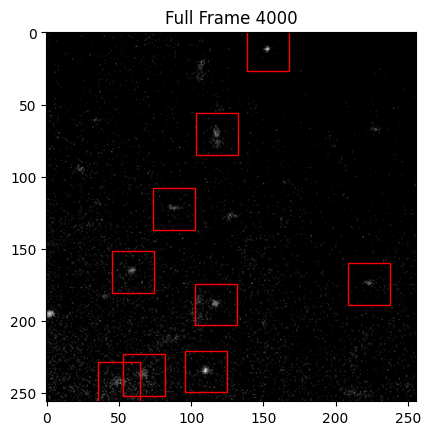

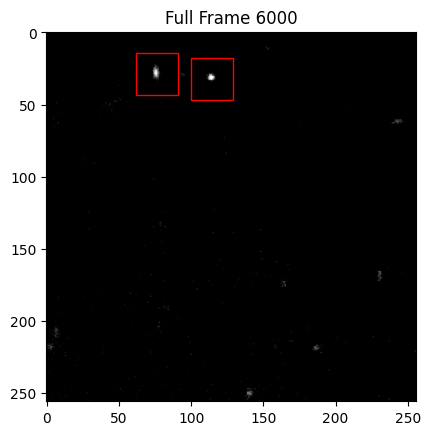

In [5]:
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5
indices = [10, 500, 1000, 2000, 4000, 6000]
# indices = np.random.choice(range(7500), 3)

A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=True, movie_frames=indices)
# A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=False)

(129, 29, 29)


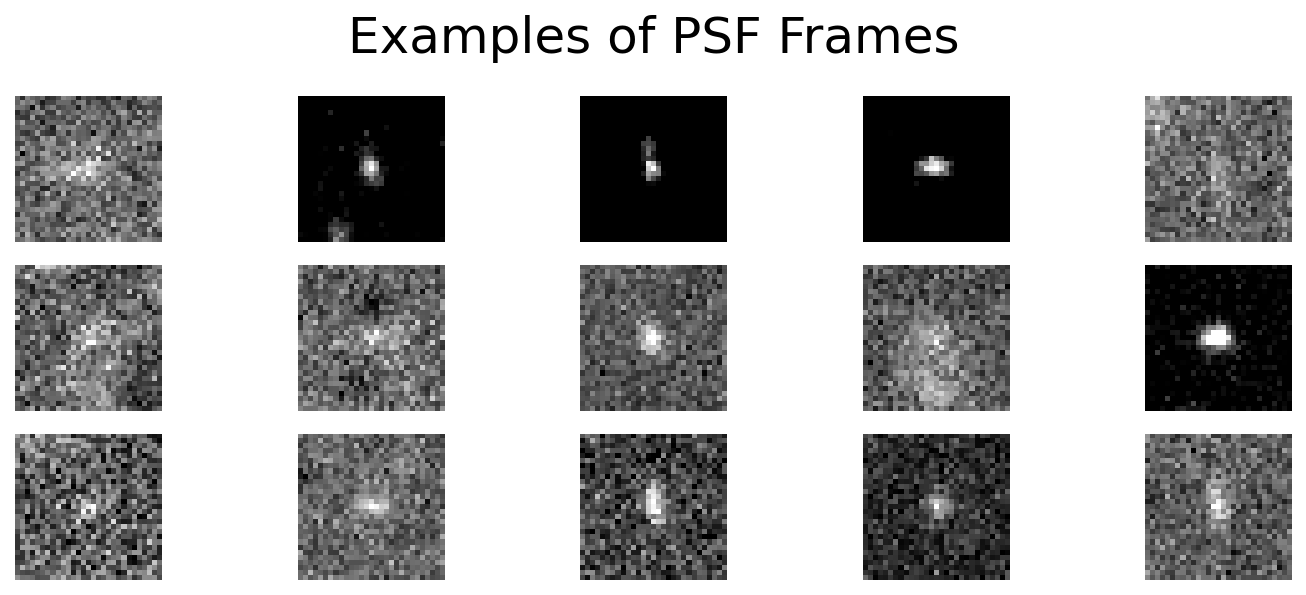

In [80]:
PSF_frames = A6_PSF_frames
print(PSF_frames.shape)
num_PSFs = 15
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
PSF_indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
image_list = PSF_frames[PSF_indices]

# Creating a 2x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=150)

# Flattening the 2D array of axes to a 1D array
axes = axes.flatten()

# Iterating over each image and corresponding axis
for i in range(len(axes)):
    # Displaying the image on the corresponding axis
    axes[i].imshow(image_list[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle("Examples of PSF Frames", fontsize=24)
plt.tight_layout()
plt.show()

In [8]:
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5
indices = [10, 500, 1000, 2000, 4000, 6000]
# A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=True, movie_frames=indices)
A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=False)

range(0, 10000)


c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


In [34]:
len(A4_PSF_frames)

165509

(165509, 29, 29)


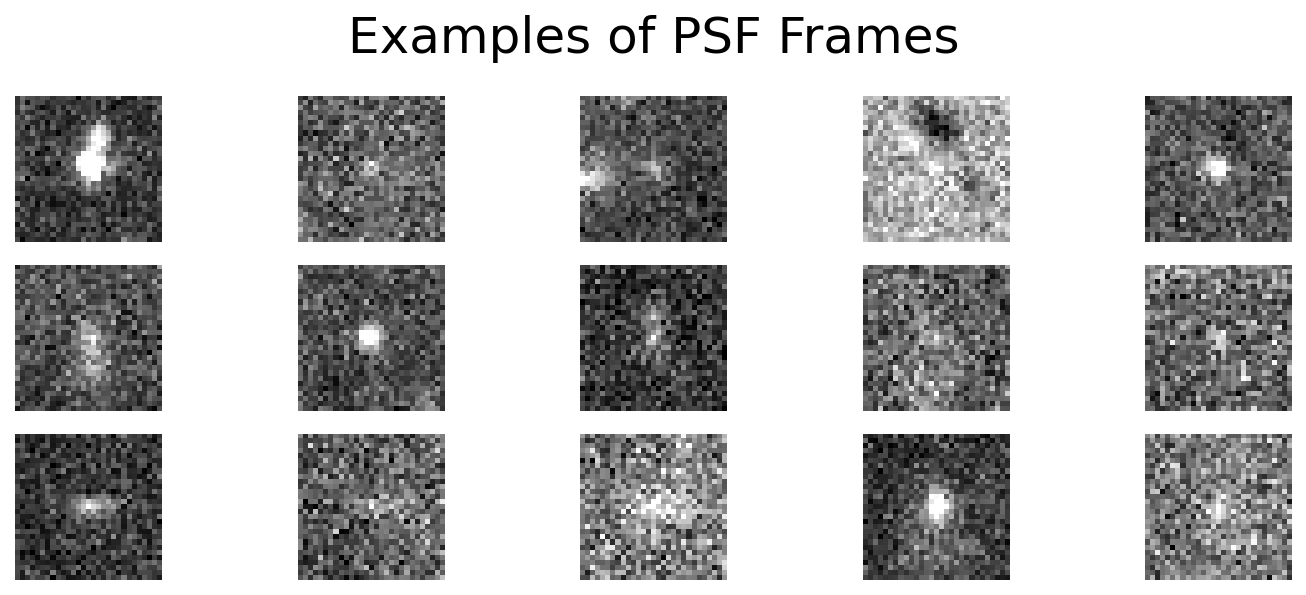

In [38]:
PSF_frames = A4_PSF_frames
print(PSF_frames.shape)
num_PSFs = 15
PSF_indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
image_list = PSF_frames[PSF_indices]

# Creating a 2x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=150)

# Flattening the 2D array of axes to a 1D array
axes = axes.flatten()

# Iterating over each image and corresponding axis
for i in range(len(axes)):
    # Displaying the image on the corresponding axis
    axes[i].imshow(image_list[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle("Examples of PSF Frames", fontsize=24)
plt.tight_layout()
plt.show()

In [9]:
with open('A6_568_29x29_gpu.npy', 'wb') as f:
    np.save(f, A6_PSF_frames)
with open('A4_640_29x29_gpu.npy', 'wb') as f:
    np.save(f, A4_PSF_frames)

# Combined Movies

In [5]:
combined = A4_640_movie[:7500] + A6_568_movie

In [78]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

C:\Users\icedn\AppData\Local\Temp\ipykernel_24248\2648478747.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


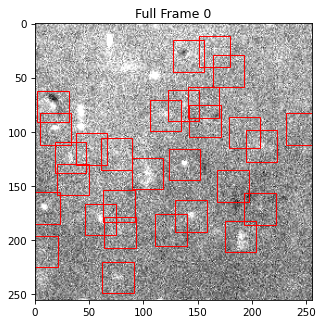

26


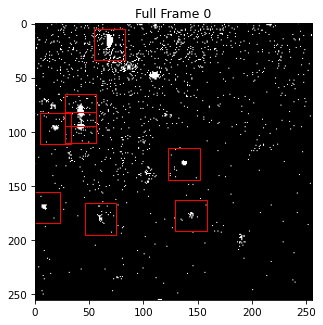

7


In [68]:
minmass = 50000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5
indices = [100]
thresh = 50000

for idx in indices:
    normal_max = np.max(A4_640_movie[idx])
    # thresholded = A4_640_movie[idx]*(A4_640_movie[idx] > thresh)
    thresholded = sigmoid(A4_640_movie[idx])
    normal_frames = get_PSF_frames([A4_640_movie[idx]], minmass, separation, diameter, 
                                   frame_size, percentile, to_plot=True, movie_frames=True, dpi=75)
    print(len(normal_frames))
    thresholded_frames = get_PSF_frames([thresholded], 1/(1+np.exp(-minmass)), separation, diameter, 
                                        frame_size, percentile, to_plot=True, movie_frames=True, dpi=75)
    print(len(thresholded_frames))

C:\Users\icedn\AppData\Local\Temp\ipykernel_24248\2648478747.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


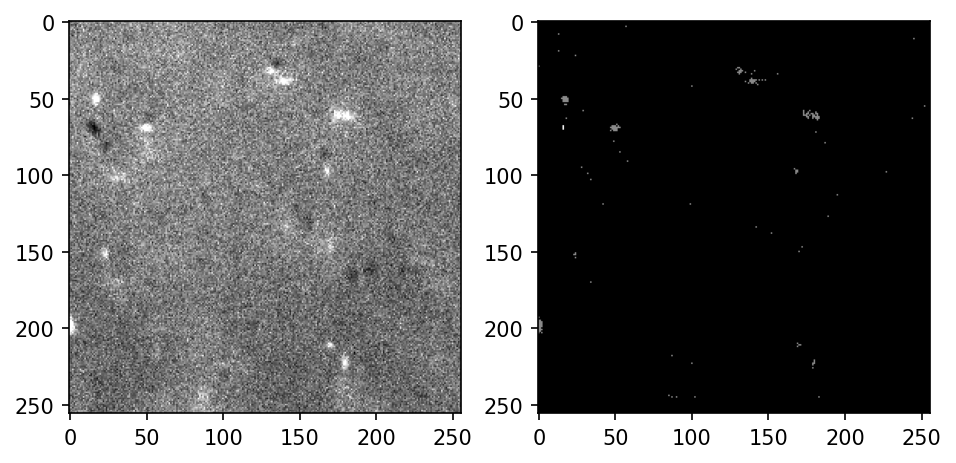

In [59]:
indices = [1000]
for idx in indices:
    # Creating a 2x5 subplot grid
    fig, axes = plt.subplots(1, 2, dpi=150)
    axes[0].imshow(A4_640_movie[idx], cmap='gray')
    axes[1].imshow(sigmoid(A4_640_movie[idx]), cmap='gray')
    plt.tight_layout()
    plt.show()

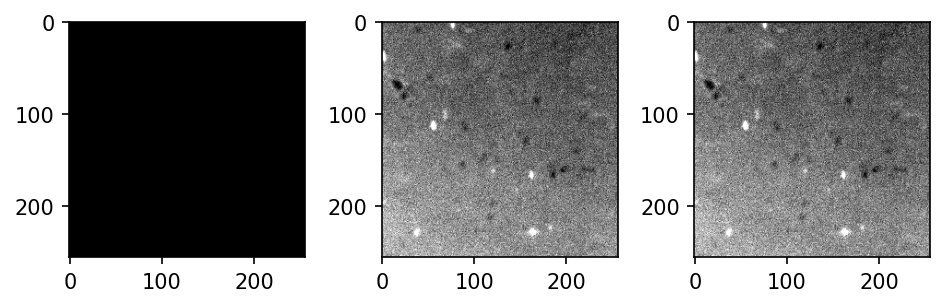

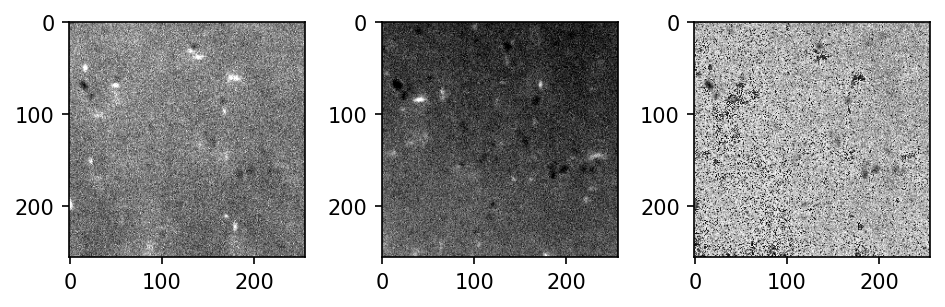

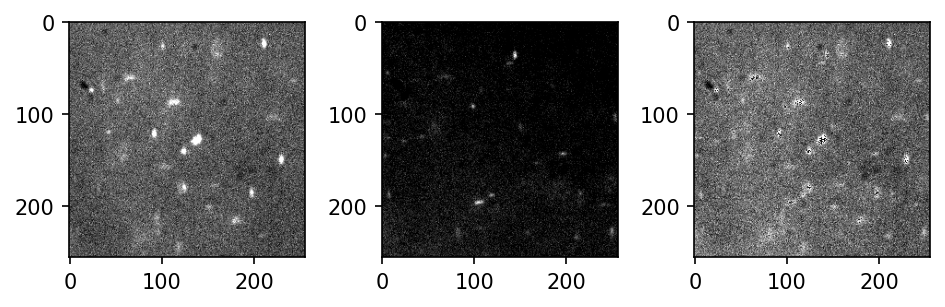

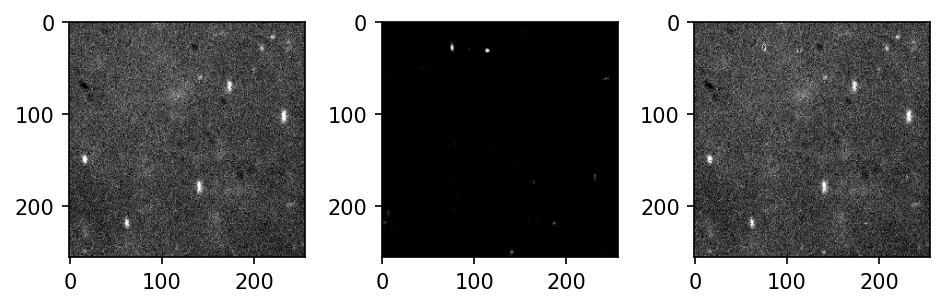

In [10]:
indices = [0, 1000, 3000, 6000]
for idx in indices:
    # Creating a 2x5 subplot grid
    fig, axes = plt.subplots(1, 3, dpi=150)
    axes[0].imshow(A4_640_movie[idx], cmap='gray')
    axes[1].imshow(A6_568_movie[idx], cmap='gray')
    axes[2].imshow(combined[idx], cmap='gray')
    plt.tight_layout()
    plt.show()

# Clean/Dirty Datasets

In [3]:
# Default Settings
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5

#### Helper Functions

In [4]:
def view_PSFs(PSF_frames, random_seed=1, dpi=100):
    print(PSF_frames.shape)
    num_PSFs = 15
    
    # random seed for reproducibility
    np.random.seed(random_seed)
    PSF_indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
    image_list = PSF_frames[PSF_indices]

    # Creating a 2x5 subplot grid
    fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=dpi)

    # Flattening the 2D array of axes to a 1D array
    axes = axes.flatten()

    # Iterating over each image and corresponding axis
    for i in range(len(axes)):
        # Displaying the image on the corresponding axis
        axes[i].imshow(image_list[i], cmap='gray')
        axes[i].axis('off')

    plt.suptitle(f"Example PSFs", fontsize=24)
    plt.tight_layout()
    plt.show()

In [6]:
import hashlib
import numpy as np

def get_image_hash(image):
    image_data = image.tobytes()
    return hashlib.md5(image_data).hexdigest()

def calculate_hashes(images):
    return [get_image_hash(image) for image in images]

def get_unique_images(larger_images, smaller_images):
    larger_hashes = set(calculate_hashes(larger_images))
    smaller_hashes = set(calculate_hashes(smaller_images))

    unique_hashes = larger_hashes - smaller_hashes

    unique_images = [image for image in larger_images if get_image_hash(image) in unique_hashes]
    
    return np.array(unique_images)


## All Frames

In [107]:
num_frames = 200
random_seed = 1 # random seed for reproducibility
np.random.seed(random_seed)
indices = np.random.choice(range(7500), num_frames)

### All Frames/Default Settings

c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


(47498, 29, 29)


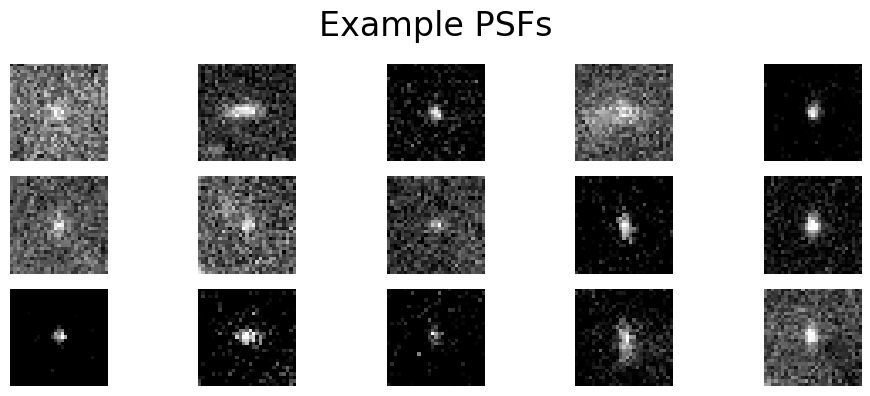

(100204, 29, 29)


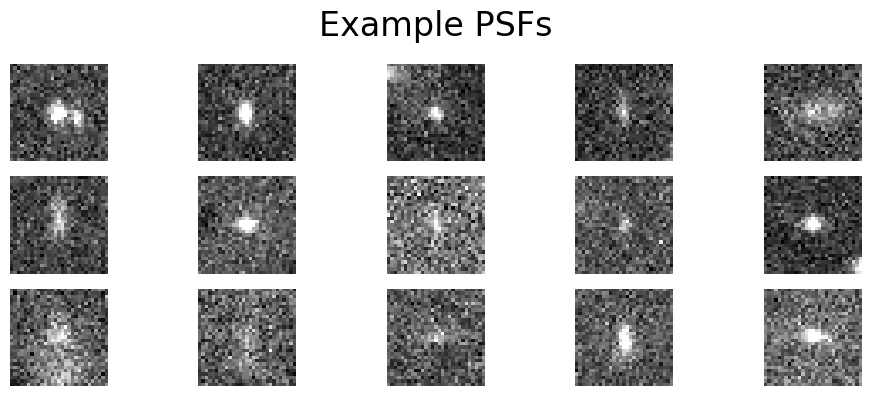

In [152]:
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5

Default_A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)
Default_A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)

view_PSFs(Default_A6_PSF_frames)
view_PSFs(Default_A4_PSF_frames)

In [156]:
with open('Category-Testing/A6_category_default.npy', 'wb') as f:
    np.save(f, Default_A6_PSF_frames)
with open('Category-Testing/A4_category_default.npy', 'wb') as f:
    np.save(f, Default_A4_PSF_frames)

### All Frames/Tight Settings

(20368, 29, 29)


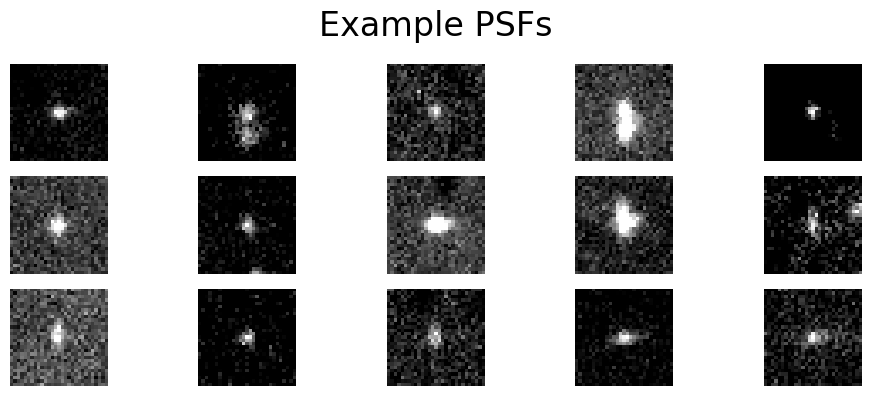

(49792, 29, 29)


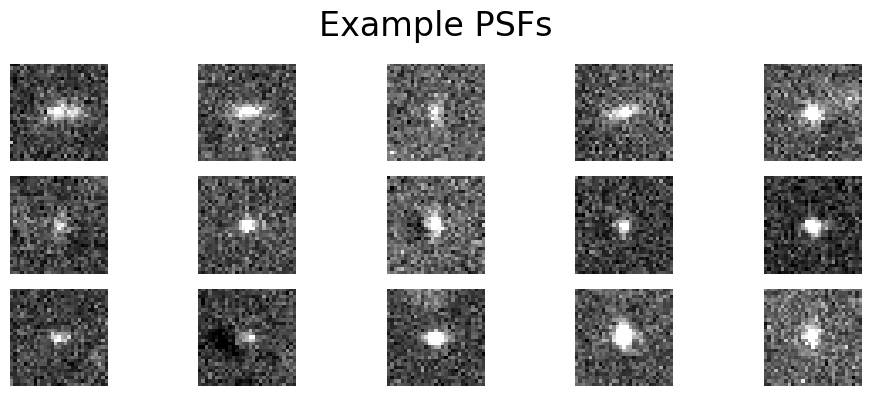

In [157]:
minmass = 130000
separation = 15
diameter = 9
frame_size = 29
percentile =99.9

Tight_A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)
Tight_A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)

view_PSFs(Tight_A6_PSF_frames)
view_PSFs(Tight_A4_PSF_frames)

In [158]:
with open('Category-Testing/A6_category_tight.npy', 'wb') as f:
    np.save(f, Tight_A6_PSF_frames)
with open('Category-Testing/A4_category_tight.npy', 'wb') as f:
    np.save(f, Tight_A4_PSF_frames)

### All Frames/Worst PSFs

c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


(4444, 29, 29)


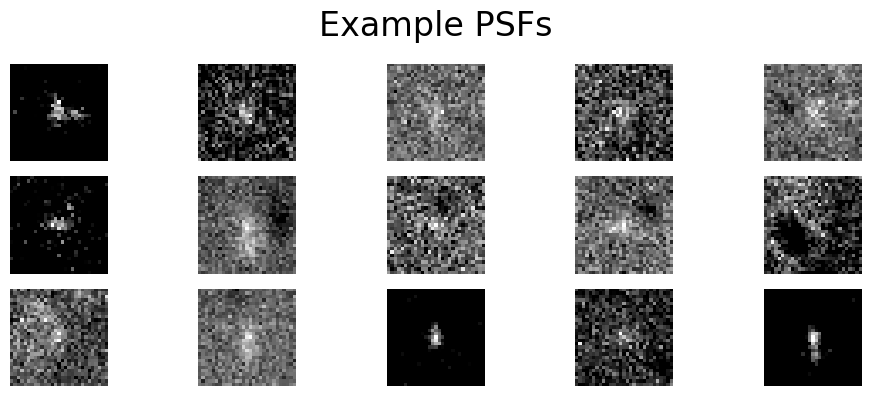

(10174, 29, 29)


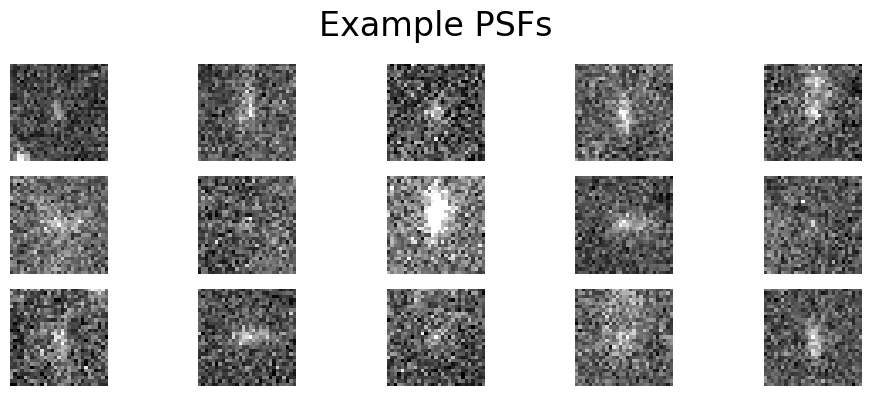

In [7]:
#Settings for upper bound
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.6

A6_upper_bound = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)
A4_upper_bound = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=True)

with open('Category-Testing/A6_category_default.npy', 'rb') as f:
    Default_A6_PSF_frames = np.load(f)
with open('Category-Testing/A4_category_default.npy', 'rb') as f:
    Default_A4_PSF_frames = np.load(f)

Worst_A6_PSF_frames = get_unique_images(Default_A6_PSF_frames, A6_upper_bound)
Worst_A4_PSF_frames = get_unique_images(Default_A4_PSF_frames, A4_upper_bound)
view_PSFs(Worst_A6_PSF_frames)
view_PSFs(Worst_A4_PSF_frames)

In [8]:
with open('Category-Testing/A6_category_worst.npy', 'wb') as f:
    np.save(f, Worst_A6_PSF_frames)
with open('Category-Testing/A4_category_worst.npy', 'wb') as f:
    np.save(f, Worst_A4_PSF_frames)

## Bright/Dark Frames

In [8]:
# num_frames = 200
# random_seed = 1 # random seed for reproducibility
# np.random.seed(random_seed)
# bright_indices = np.random.choice(range(1000), num_frames)
# A6_dark_indices = np.random.choice(range(6000, 7500), num_frames)
# A4_dark_indices = np.random.choice(range(8500, 10000), num_frames)

bright_indices = range(1000)
A6_dark_indices = range(6000, 7500)
A4_dark_indices = range(8500, 10000)

### Bright Frames/Default Settings

c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


(11168, 29, 29)


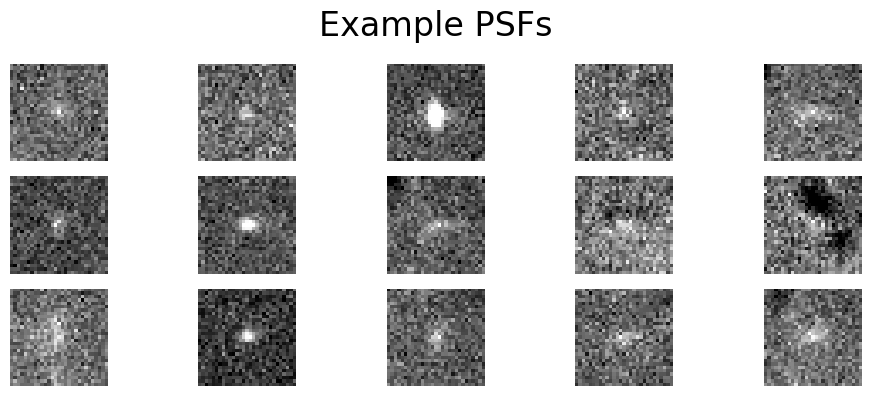

(12322, 29, 29)


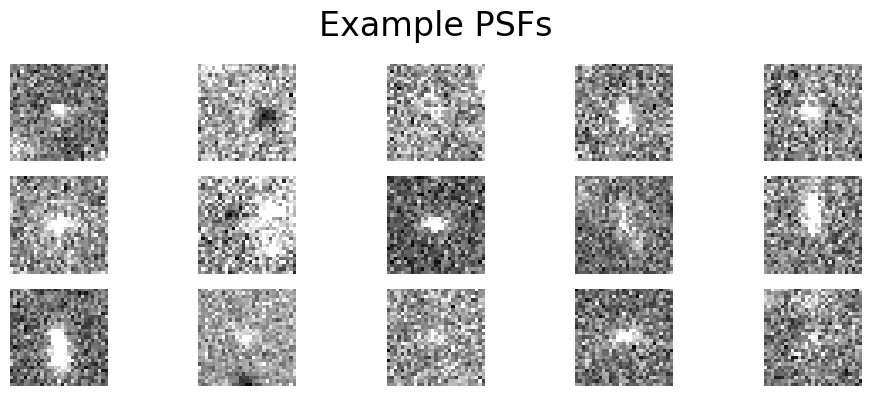

In [9]:
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5

Bright_A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=bright_indices)
Bright_A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=bright_indices)

view_PSFs(Bright_A6_PSF_frames)
view_PSFs(Bright_A4_PSF_frames)

In [10]:
with open('Category-Testing/A6_category_bright.npy', 'wb') as f:
    np.save(f, Bright_A6_PSF_frames)
with open('Category-Testing/A4_category_bright.npy', 'wb') as f:
    np.save(f, Bright_A4_PSF_frames)

### Dark Frames/Default Settings

c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


(2159, 29, 29)


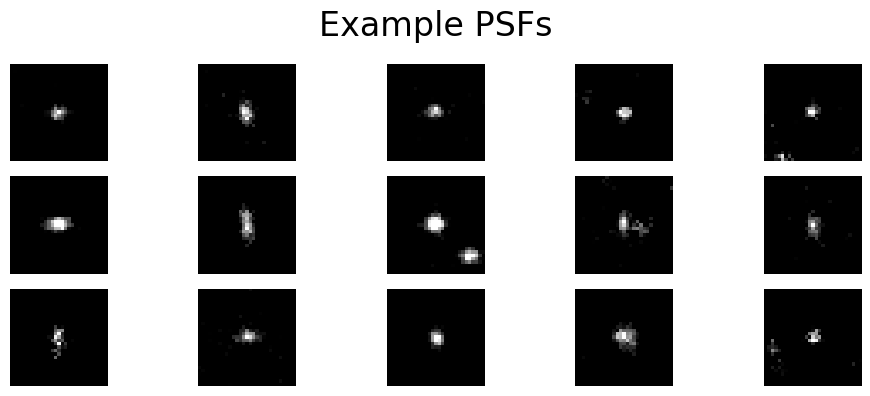

(13673, 29, 29)


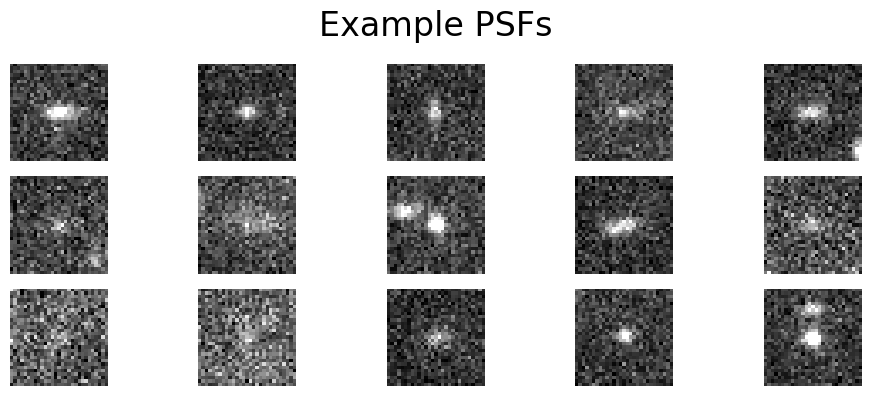

In [11]:
minmass = 100000
separation = 15
diameter = 9
frame_size = 29
percentile =99.5

Dark_A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=A6_dark_indices)
Dark_A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=A4_dark_indices)

view_PSFs(Dark_A6_PSF_frames)
view_PSFs(Dark_A4_PSF_frames)

In [12]:
with open('Category-Testing/A6_category_dark.npy', 'wb') as f:
    np.save(f, Dark_A6_PSF_frames)
with open('Category-Testing/A4_category_dark.npy', 'wb') as f:
    np.save(f, Dark_A4_PSF_frames)